# 6章

## 重みの初期値

重みというパラメータは勾配法を使って更新していくことで損失関数が最小値となるパラメータを探索する。この勾配法の初期値をどうするかという問題について。

### Xavierの初期値

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [3]:
def ReLU(x):
    return np.maximum(0, x)

In [4]:
def tanh(x):
    return np.tanh(x)

5層のネットワークを作って活性化関数の出力を見る。

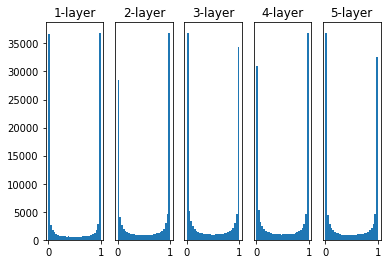

In [5]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    w = np.random.randn(node_num, node_num) * 1

    a = np.dot(x, w)

    z = sigmoid(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

5層のニューラルネットの各層の活性化関数の出力の分布。
各層は100個のノードで作られている。その100個のシグモイド関数の出力がどうなっているか。

重みの初期値を標準偏差1のガウス分布で初期化した場合。
シグモイド関数の出力は0や1に近い値に偏っている。
これはニューラルネットワークにとって問題。シグモイド関数で0や1に近い値を出力する場所というのは勾配がほとんど0になっているので学習が進まない。

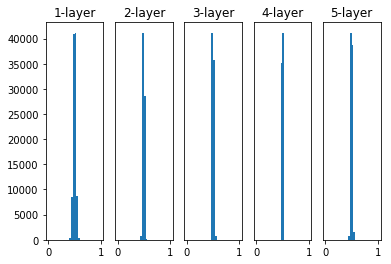

In [6]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

初期値を標準偏差0.01のガウス分布で与えた場合はこうなる。
さっきとは違って0.5のあたりに偏っているので勾配消失は怒らないのだけど、これはこれで問題がある。
すべてのノードがほぼ同じような値を出力するならば、それは一つのノードでほぼ表現できる。
表現力を増やすためには勾配が消失しない程度の範囲でバラけていてくれるとありがたい。

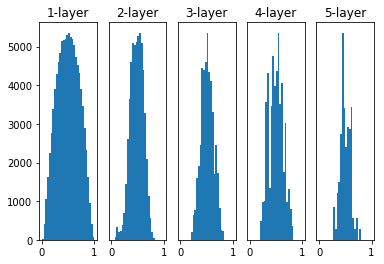

In [8]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

Xavierの論文で推奨している、通称Xavierの初期値を使うと良い感じにしてくれる。
前層のノードの数を$n$としたとき、標準偏差$\frac{1}{\sqrt{n}}$の分布を使うというもの。

試してみたのが上のやつ。上位の層に行くとややいびつだけれども広がりがありつつ0や1を取らない良い感じになっている事がわかる。

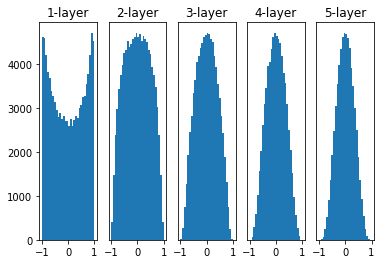

In [13]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

#     z = sigmoid(a)
    # z = ReLU(a)
    z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(-1,1))
plt.show()

sigmoid関数の代わりにtanh関数を利用すると上位の層でも良い感じになるとのことだったので試してみた。tanhはsigmoidとは違って0から1ではなくて-1から1を出力するね。

1層目がちょっと問題あるように見えるけどなんで7日はよくわからない。

### Heの初期値

Xavierの初期値は活性化関数が線形だったと仮定して中央付近によるように計算したものらしい。活性化関数がSigmoidやtanhのようなx軸0で点対称になっている場合には有用だそうだ。

一方で活性化関数にReLUを使う場合はHeの初期値というのを使うのが推奨されているようだ。
$n$を前層でのノードの数とした場合に$\sqrt{\frac{2}{n}}$を標準偏差とする分布を利用する。

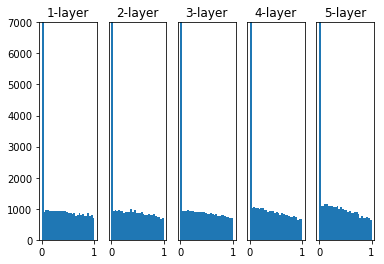

In [16]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
#     w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

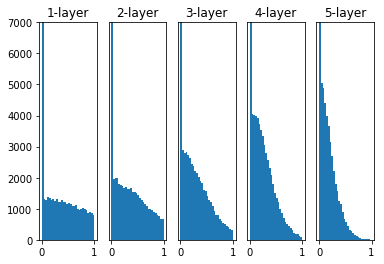

In [18]:
input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

#     w = np.random.randn(node_num, node_num) * 1
#     w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
#     w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

#     z = sigmoid(a)
    z = ReLU(a)
#     z = tanh(a)

    activations[i] = z

for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

ReLUでXavierを使った場合、層を重ねるとどんどん0に偏っていってしまう。

### MNISTでの比較

===========iteration:0===========
std=0.01:2.3025335321771765
Xavier:2.3076722182982508
He:2.4483697354873195
===========iteration:100===========
std=0.01:2.302105266896216
Xavier:2.271206185579316
He:1.4948693623001046
===========iteration:200===========
std=0.01:2.301990508835026
Xavier:2.2046539051366114
He:0.8889668776950588
===========iteration:300===========
std=0.01:2.2985822963795446
Xavier:1.9435037797910857
He:0.43654774513432437
===========iteration:400===========
std=0.01:2.299761358021027
Xavier:1.4956337635160042
He:0.32700695587161194
===========iteration:500===========
std=0.01:2.299026393880779
Xavier:0.9752863309679913
He:0.3189082657662853
===========iteration:600===========
std=0.01:2.301158218436762
Xavier:0.7272865845205807
He:0.31020347381564484
===========iteration:700===========
std=0.01:2.2981299859283544
Xavier:0.6627435391202
He:0.34920315674086855
===========iteration:800===========
std=0.01:2.296471002514895
Xavier:0.41478838523841455
He:0.1802324134967002

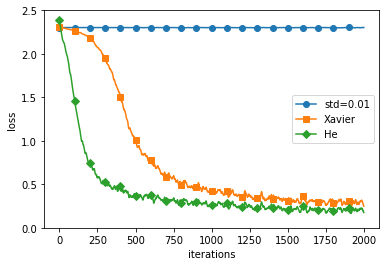

In [17]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

ReLUで各初期値を使った場合にどのように学習が進んでいくか。

標準偏差0.01の場合はまるで学習が進んでいないことがわかる。順伝播でほとんど0の値になるため逆伝播で求める勾配も小さな値になってしまうため。

HeとXavierは学習が進んでいて、Heのほうが学習の進みが早い。